# Exploratory Data Analysis on Reliance Stock Prices

In this notebook, we will perform exploratory data analysis (EDA) on the stock price data of Reliance. We will visualize trends, understand the data distribution, and prepare for further analysis.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualisation style
sns.set(style='whitegrid')

In [ ]:
import yfinance as yf

# Download Reliance stock data
#df = yf.download('RELIANCE.NS', start='2025-01-01', end='2025-07-25')

# Save to Excel or CSV
#df.to_excel('RELIANCE_stock_data.xlsx')

# Show the first few rows
print(df.head())


C:\Users\hp\AppData\Local\Temp\ipykernel_18448\3279721608.py:4: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker      RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS RELIANCE.NS
Date                                                                      
2025-01-01  1221.250000  1226.300049  1211.599976  1214.849976     5892590
2025-01-02  1241.800049  1244.449951  1220.000000  1221.250000    15486276
2025-01-03  1251.150024  1262.050049  1235.500000  1243.900024    15521102
2025-01-06  1218.000000  1262.000000  1215.000000  1253.949951    14816766
2025-01-07  1240.849976  1244.500000  1221.250000  1222.000000    10070505


In [31]:
df = pd.read_excel(r'E:\randomForestClassifier\reliance-stock-rf-classifier\notebooks\RELIANCE_stock_data.xlsx', engine='openpyxl')


In [32]:
# Show the first few rows
print(df.head())

        Date        Close         High          Low         Open    Volume
0 2025-01-01  1221.250000  1226.300049  1211.599976  1214.849976   5892590
1 2025-01-02  1241.800049  1244.449951  1220.000000  1221.250000  15486276
2 2025-01-03  1251.150024  1262.050049  1235.500000  1243.900024  15521102
3 2025-01-06  1218.000000  1262.000000  1215.000000  1253.949951  14816766
4 2025-01-07  1240.849976  1244.500000  1221.250000  1222.000000  10070505


In [33]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

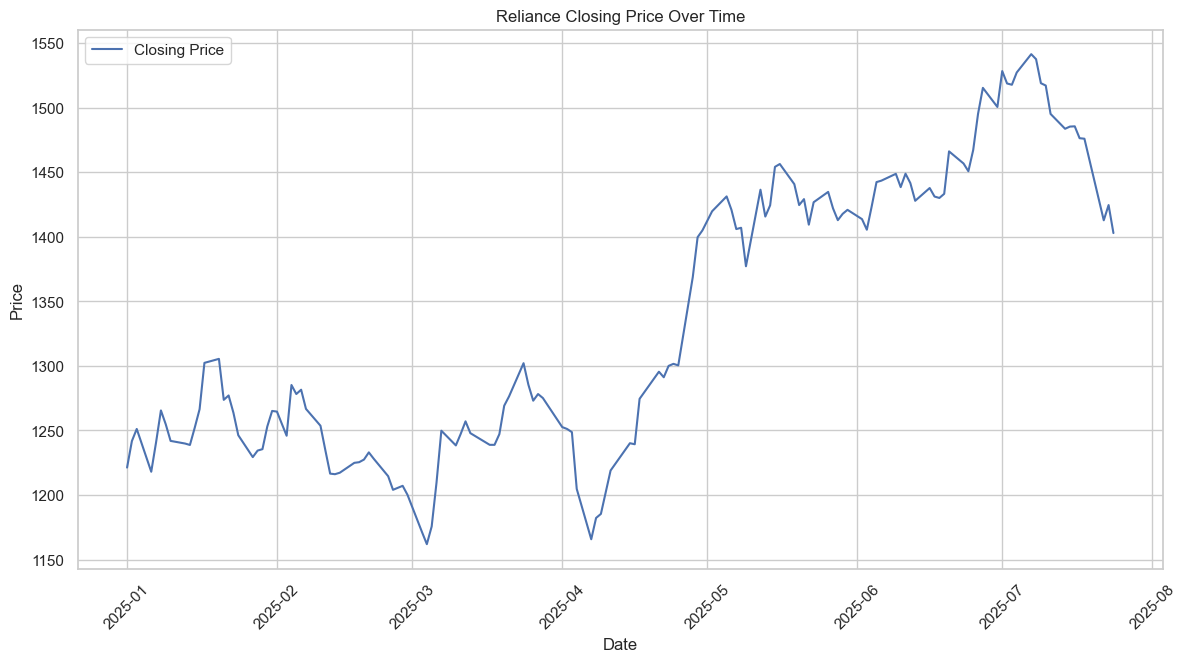

In [34]:
# Visualize the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.title('Reliance Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

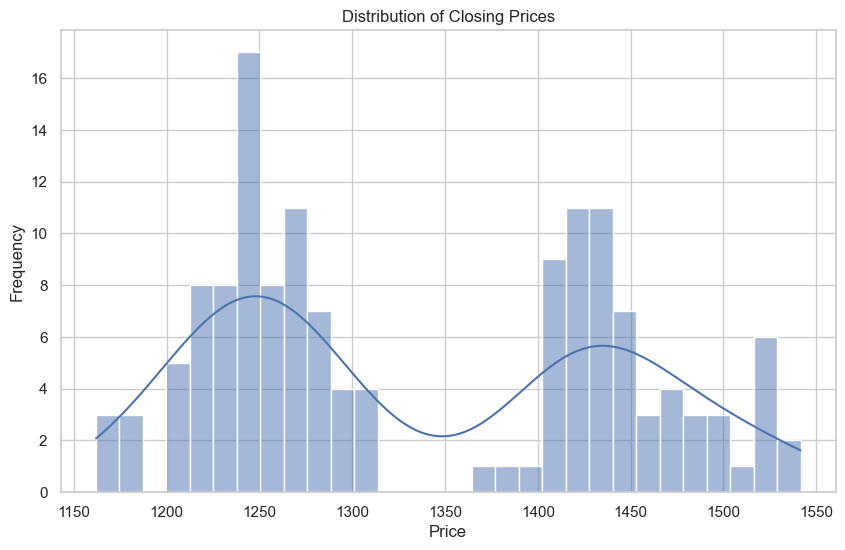

In [35]:
# Visualize the distribution of closing prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=30, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

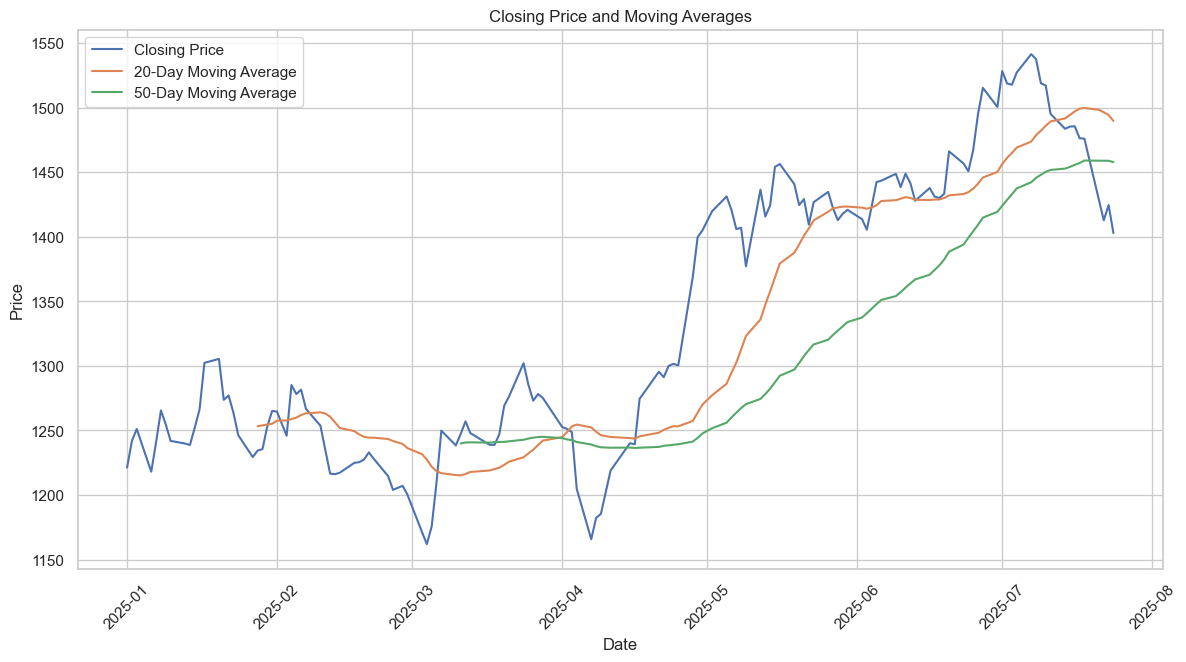

In [36]:
# Calculate and visualize moving averages
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.plot(df['Date'], df['MA20'], label='20-Day Moving Average')
plt.plot(df['Date'], df['MA50'], label='50-Day Moving Average')
plt.title('Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

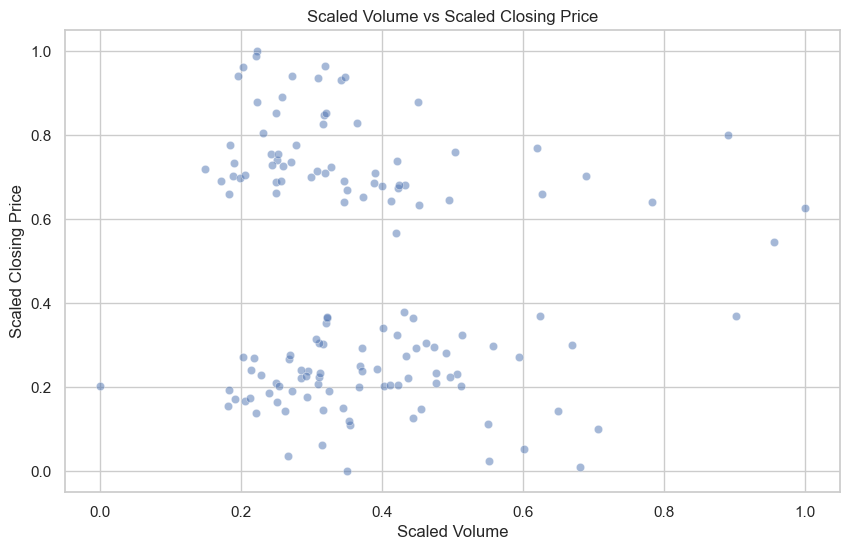

In [37]:
from sklearn.preprocessing import MinMaxScaler

# Scale Volume and Close price
scaler = MinMaxScaler()
df[['Volume_scaled', 'Close_scaled']] = scaler.fit_transform(df[['Volume', 'Close']])

# Plot scaled Volume vs scaled Closing Price relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Volume_scaled'], y=df['Close_scaled'], alpha=0.5)
plt.title('Scaled Volume vs Scaled Closing Price')
plt.xlabel('Scaled Volume')
plt.ylabel('Scaled Closing Price')
plt.show()

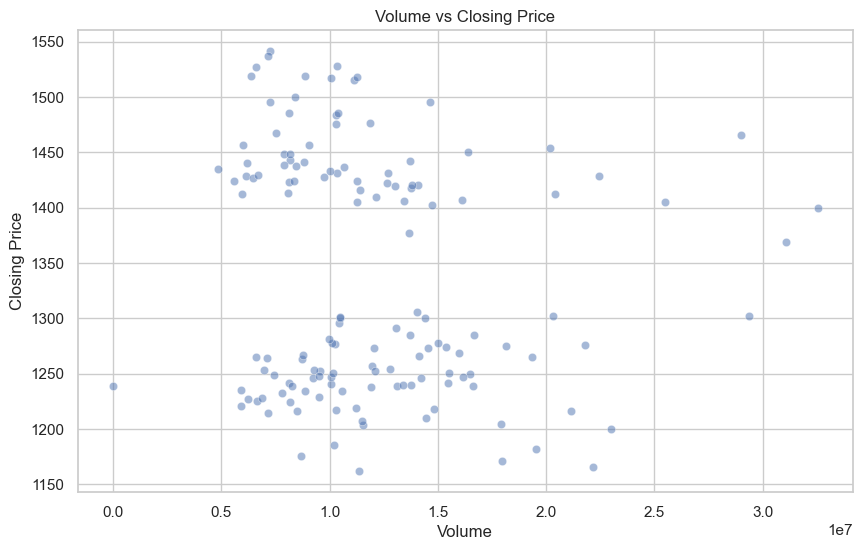

In [38]:
# Plot Volume vs Closing Price relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Volume'], y=df['Close'], alpha=0.5)
plt.title('Volume vs Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.show()

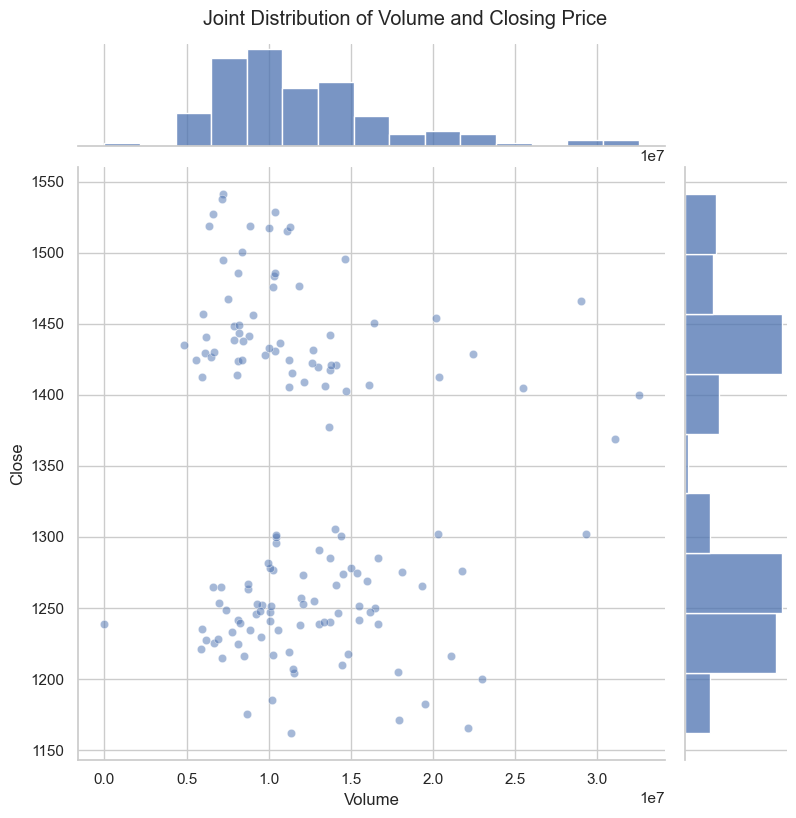

In [40]:
sns.jointplot(x='Volume', y='Close', data=df, kind='scatter', height=8, alpha=0.5)
plt.suptitle('Joint Distribution of Volume and Closing Price', y=1.02)
plt.show()

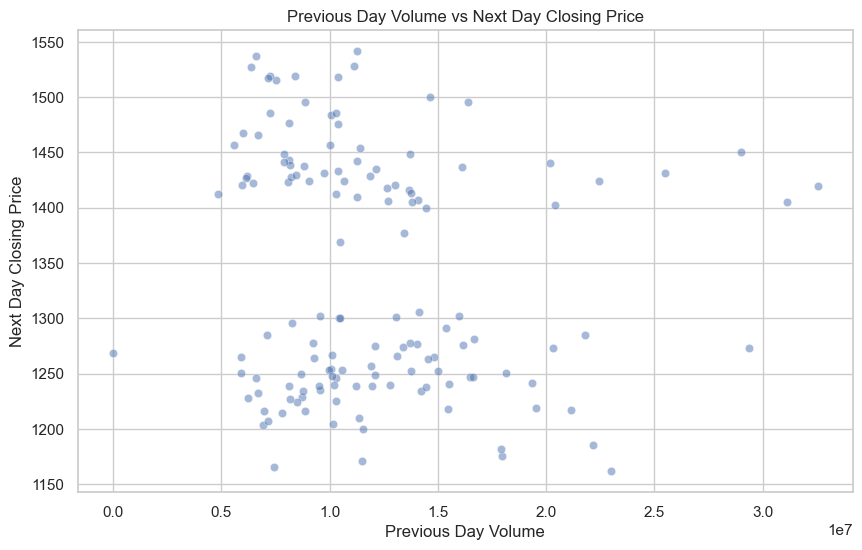

In [41]:
# Create a column for previous day's volume
df['Prev_Volume'] = df['Volume'].shift(1)
# Create a column for next day's close price
df['Next_Close'] = df['Close'].shift(-1)

# Drop rows with NaN values created by shifting
temp_df = df.dropna(subset=['Prev_Volume', 'Next_Close'])

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x=temp_df['Prev_Volume'], y=temp_df['Next_Close'], alpha=0.5)
plt.title('Previous Day Volume vs Next Day Closing Price')
plt.xlabel('Previous Day Volume')
plt.ylabel('Next Day Closing Price')
plt.show()

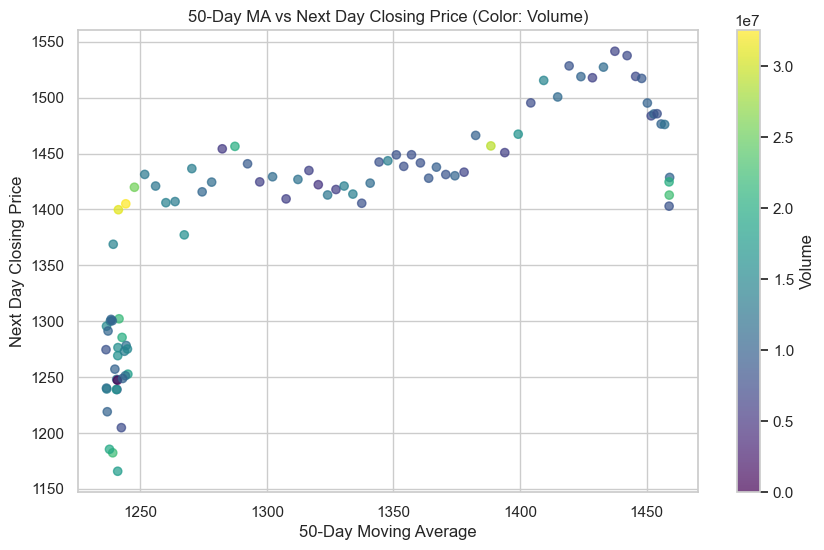

In [42]:
# Create a column for next day's close price if not already present
df['Next_Close'] = df['Close'].shift(-1)

# Drop rows with NaN values created by shifting or rolling
temp_df = df.dropna(subset=['MA50', 'Next_Close', 'Volume'])

# Plot: 50-Day Moving Average vs Next Day Closing Price, colored by Volume
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    temp_df['MA50'], temp_df['Next_Close'],
    c=temp_df['Volume'], cmap='viridis', alpha=0.7
)
plt.colorbar(scatter, label='Volume')
plt.title('50-Day MA vs Next Day Closing Price (Color: Volume)')
plt.xlabel('50-Day Moving Average')
plt.ylabel('Next Day Closing Price')
plt.show()

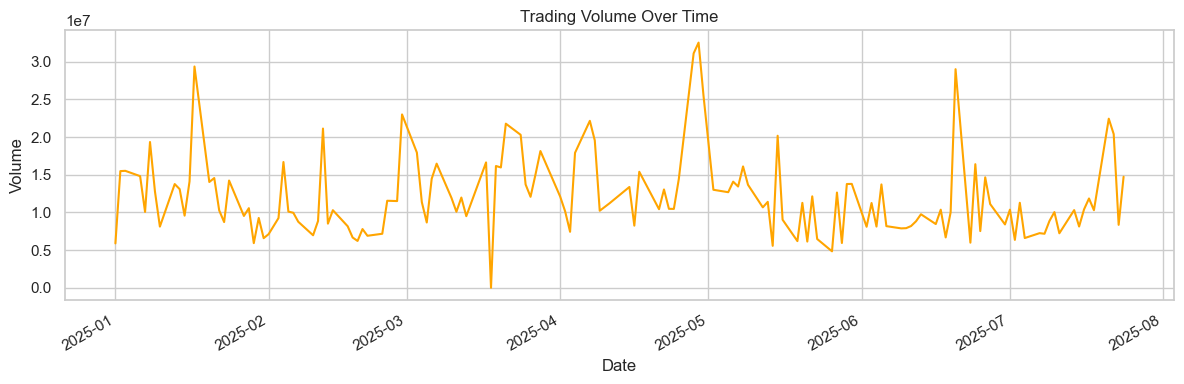

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Now plot Volume over time with correct x-axis
df['Volume'].plot(figsize=(12, 4), title='Trading Volume Over Time', color='orange')
plt.xlabel('Date')  # Optional: Label the x-axis
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()



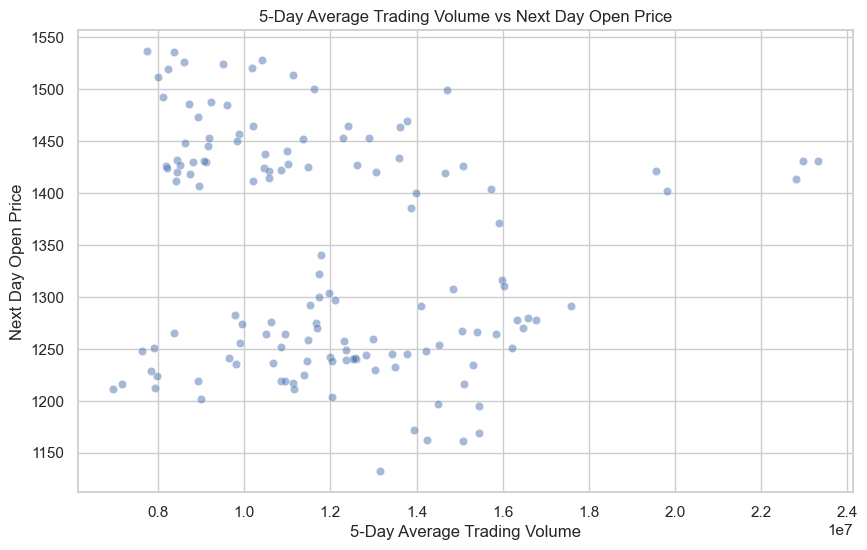

In [44]:
# Calculate 5-day average trading volume
df['Avg_Volume_5'] = df['Volume'].rolling(window=5).mean()

# Create a column for next day's open price
df['Next_Open'] = df['Open'].shift(-1)

# Drop rows with NaN values created by rolling and shifting
temp_df = df.dropna(subset=['Avg_Volume_5', 'Next_Open'])

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x=temp_df['Avg_Volume_5'], y=temp_df['Next_Open'], alpha=0.5)
plt.title('5-Day Average Trading Volume vs Next Day Open Price')
plt.xlabel('5-Day Average Trading Volume')
plt.ylabel('Next Day Open Price')
plt.show()

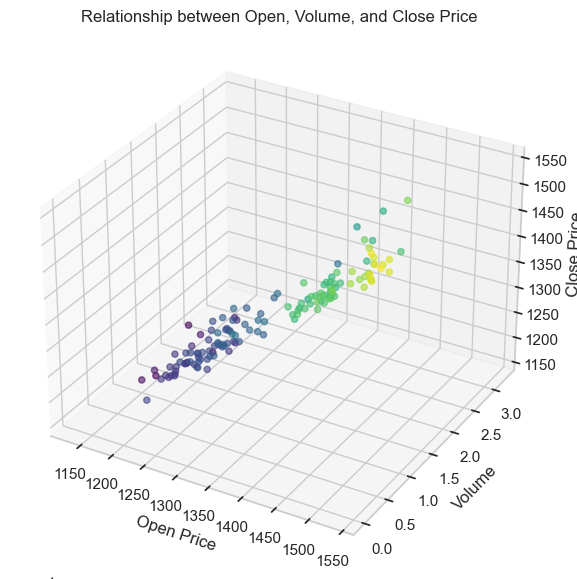

In [45]:
# 3D Scatter plot: Daily Open, Volume, and Close

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Open'], df['Volume'], df['Close'], c=df['Close'], cmap='viridis', alpha=0.6)
ax.set_xlabel('Open Price')
ax.set_ylabel('Volume')
ax.set_zlabel('Close Price')
ax.set_title('Relationship between Open, Volume, and Close Price')
plt.show()

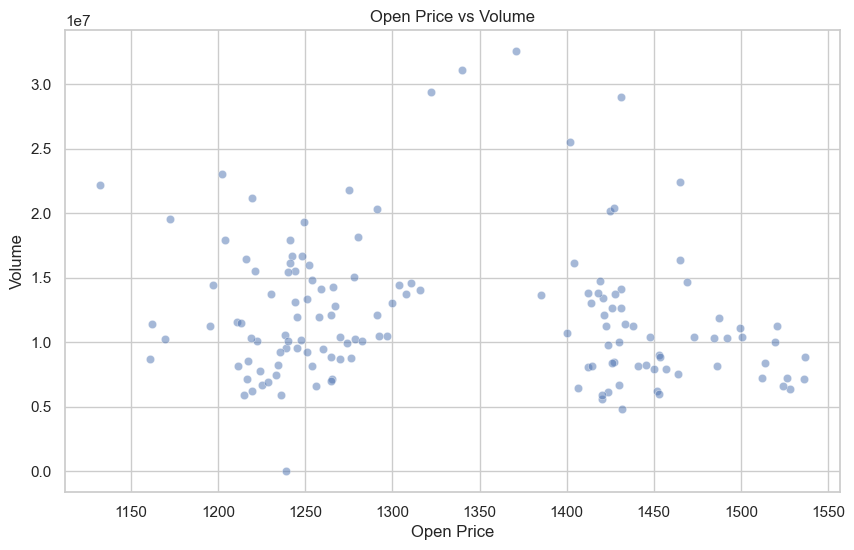

In [46]:
# Plot Open Price vs Volume relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Open'], y=df['Volume'], alpha=0.5)
plt.title('Open Price vs Volume')
plt.xlabel('Open Price')
plt.ylabel('Volume')
plt.show()